# Hierarchical Clustering

##Imports

In [2]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

##Data Generation

In [3]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

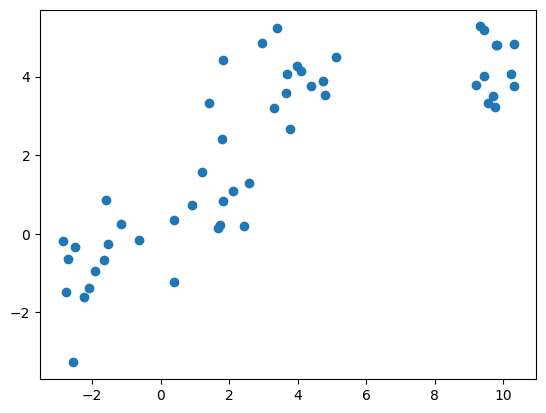

In [4]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

##Model

In [5]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [6]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

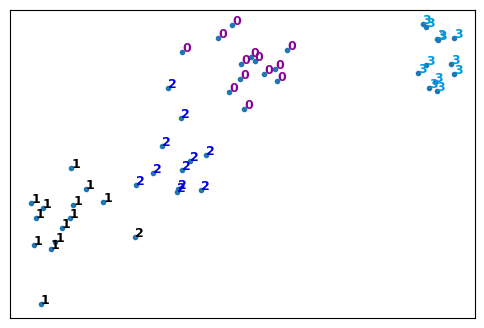

In [7]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [8]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.26333108 0.18478938 ... 0.19758279 0.64843432 0.33190987]
 [0.26333108 0.         0.12145361 ... 0.07033731 0.38785028 0.09854217]
 [0.18478938 0.12145361 0.         ... 0.10140296 0.49841142 0.15393715]
 ...
 [0.19758279 0.07033731 0.10140296 ... 0.         0.45085208 0.16116824]
 [0.64843432 0.38785028 0.49841142 ... 0.45085208 0.         0.35567807]
 [0.33190987 0.09854217 0.15393715 ... 0.16116824 0.35567807 0.        ]]


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

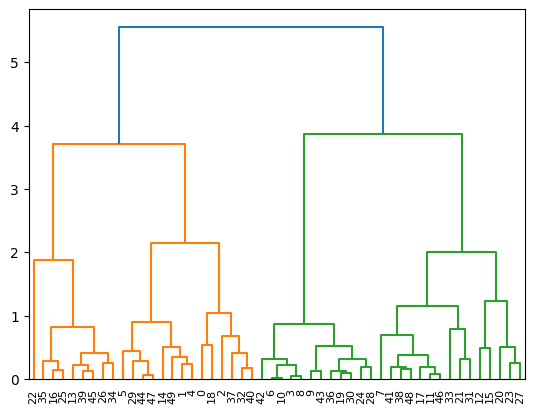

In [10]:
dendro = hierarchy.dendrogram(Z)

## Using average linkage

<ipython-input-11-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


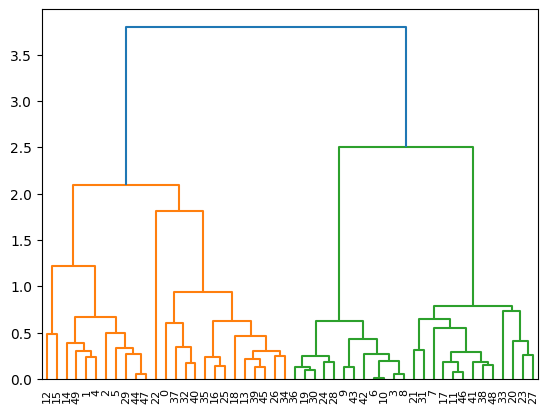

In [11]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)